<a href="https://colab.research.google.com/github/B-V-SAI-PRANAV/MACHINE-LEARNING-/blob/main/K_means_clustering_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [99]:
data=pd.read_csv('/content/data.csv',delimiter=',',encoding="ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [100]:
data.shape

(541909, 8)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [102]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [103]:
#describe function always gives the description of int, float data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [104]:
#for seeing the description of non numeric feature
data.describe(exclude=['int64','float64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [105]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [107]:
#Deleting all the null values
data.dropna(inplace=True)

In [108]:
data.shape

(406829, 8)

In [109]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [110]:
#checking for negative values - cacelled orders
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [111]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [112]:
#Drop the negative values or the quantity
data.drop(data[data['Quantity']<0].index,inplace=True)

In [114]:
data.shape

(397924, 8)

In [116]:
#Calculating the total amount
data['Total Amount']=data['Quantity']*data['UnitPrice']
new_data=data.groupby('CustomerID')['Total Amount'].sum().reset_index()

In [117]:
new_data

,CustomerID,Total Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [118]:
type(new_data)

pandas.core.frame.DataFrame

In [119]:
#calculate the total number of transactions each cutomer is doing -as number of transactions increases the spending also inceases
num_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [120]:
type(num_trans)

pandas.core.frame.DataFrame

In [121]:
#Calculate the last transaction
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['Last Transaction']=(data['InvoiceDate'].max()-data['InvoiceDate']).dt.days
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Total Amount,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,15.30,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,25.50,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,11.10,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,11.10,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,54.08,373


In [122]:
lt=data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()

In [123]:
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [125]:
#merging all the tables
merge_table=pd.merge(lt,num_trans,how='inner',on='CustomerID')
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Total Amount
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


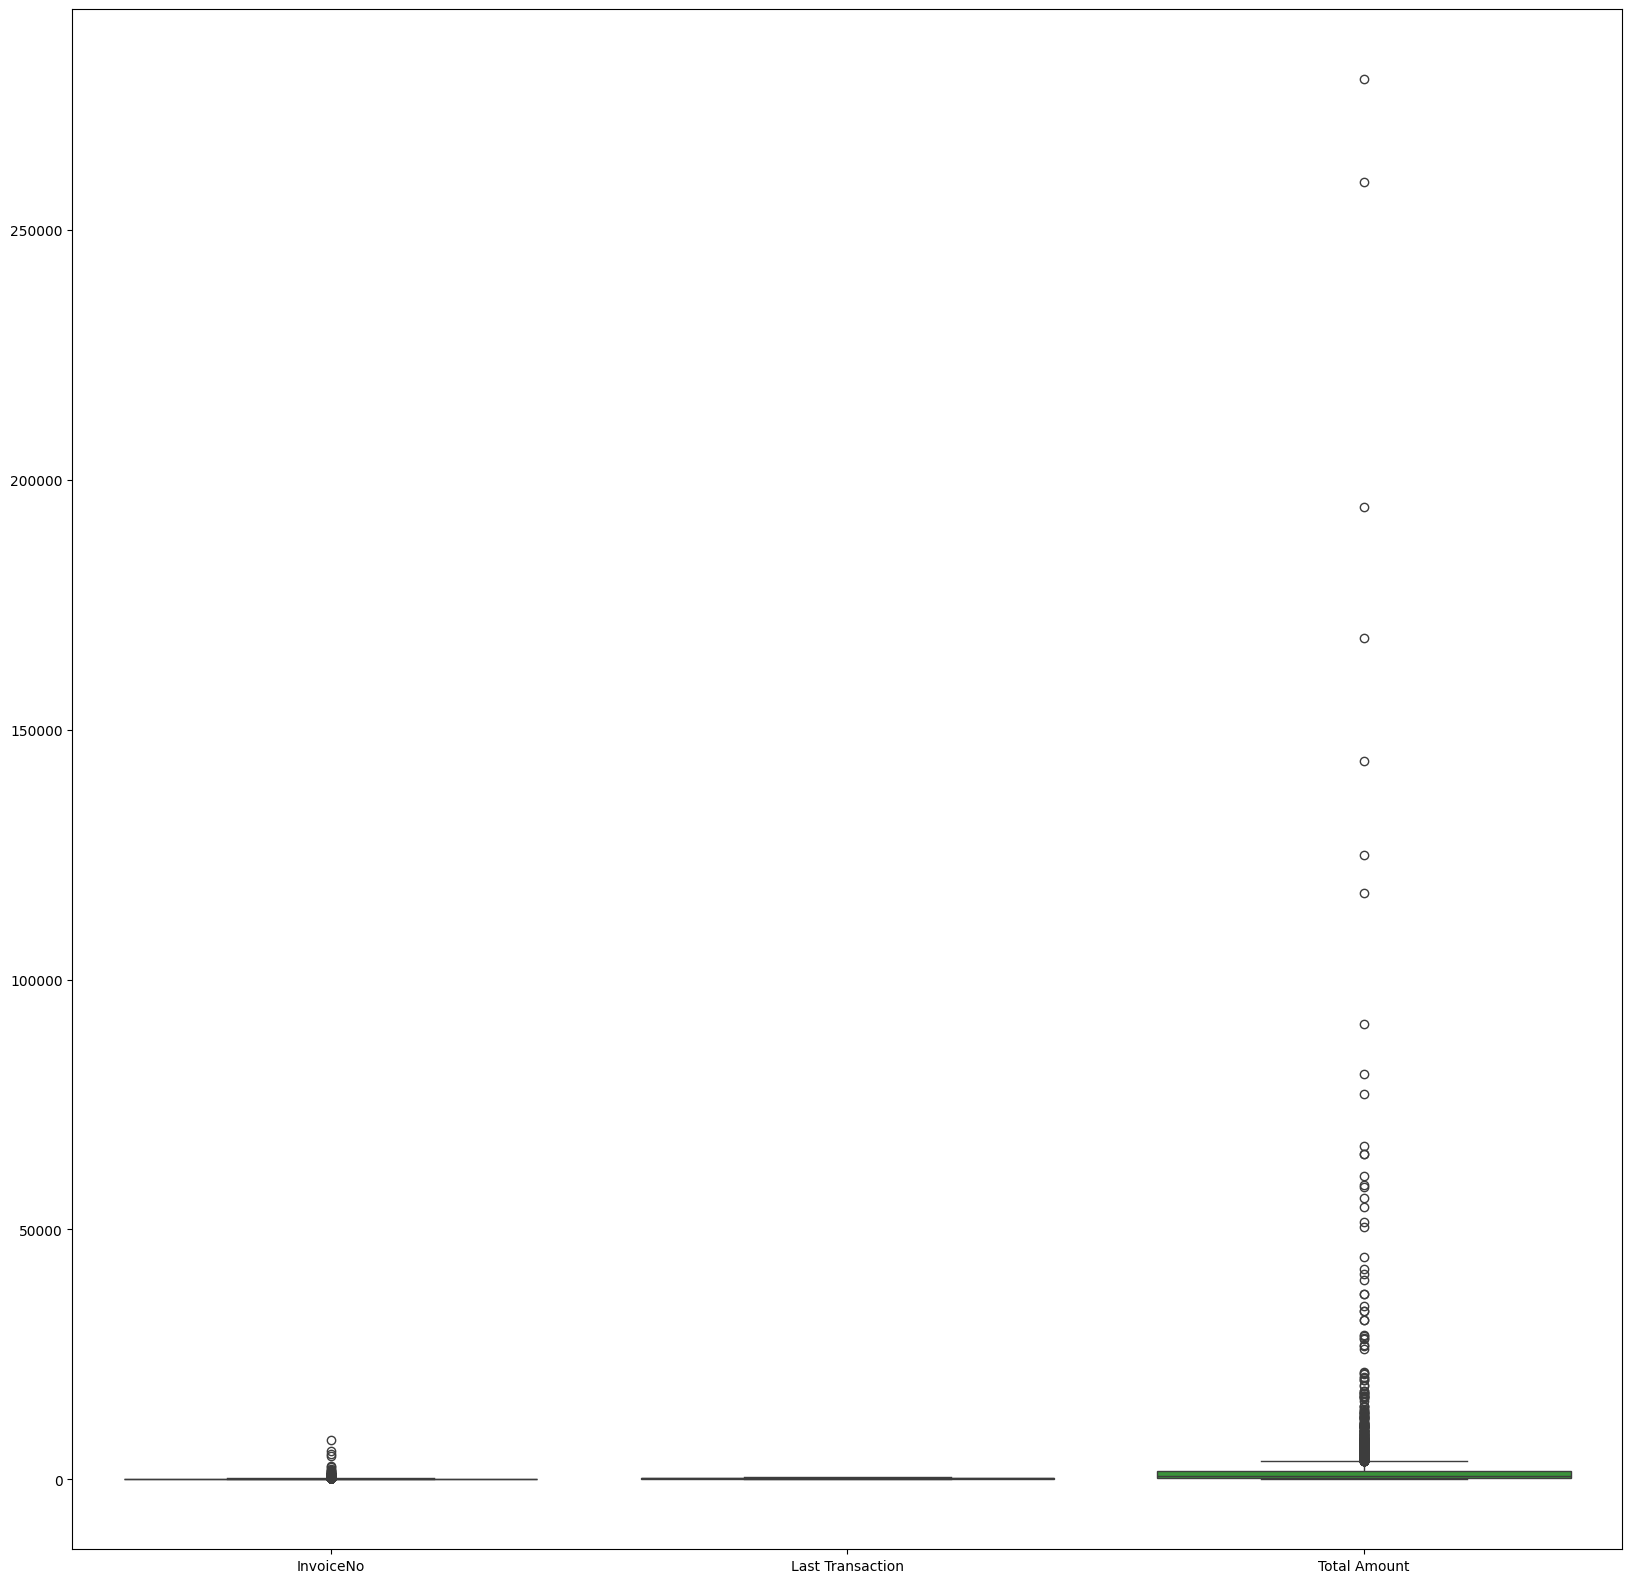

In [128]:
#Removing the outlier
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df[['InvoiceNo','Last Transaction','Total Amount']])
plt.show()

In [129]:
IQR=new_df['Total Amount'].quantile(0.75)-new_df['Total Amount'].quantile(0.25)
lower_limit=new_df['Total Amount'].quantile(0.25)-(IQR*1.5)
upper_limit=new_df['Total Amount'].quantile(0.75)+(IQR*1.5)
new_df_iqr=new_df[(new_df['Total Amount']<upper_limit) & (new_df['Total Amount']>lower_limit)]
new_df_iqr.shape

(3923, 5)

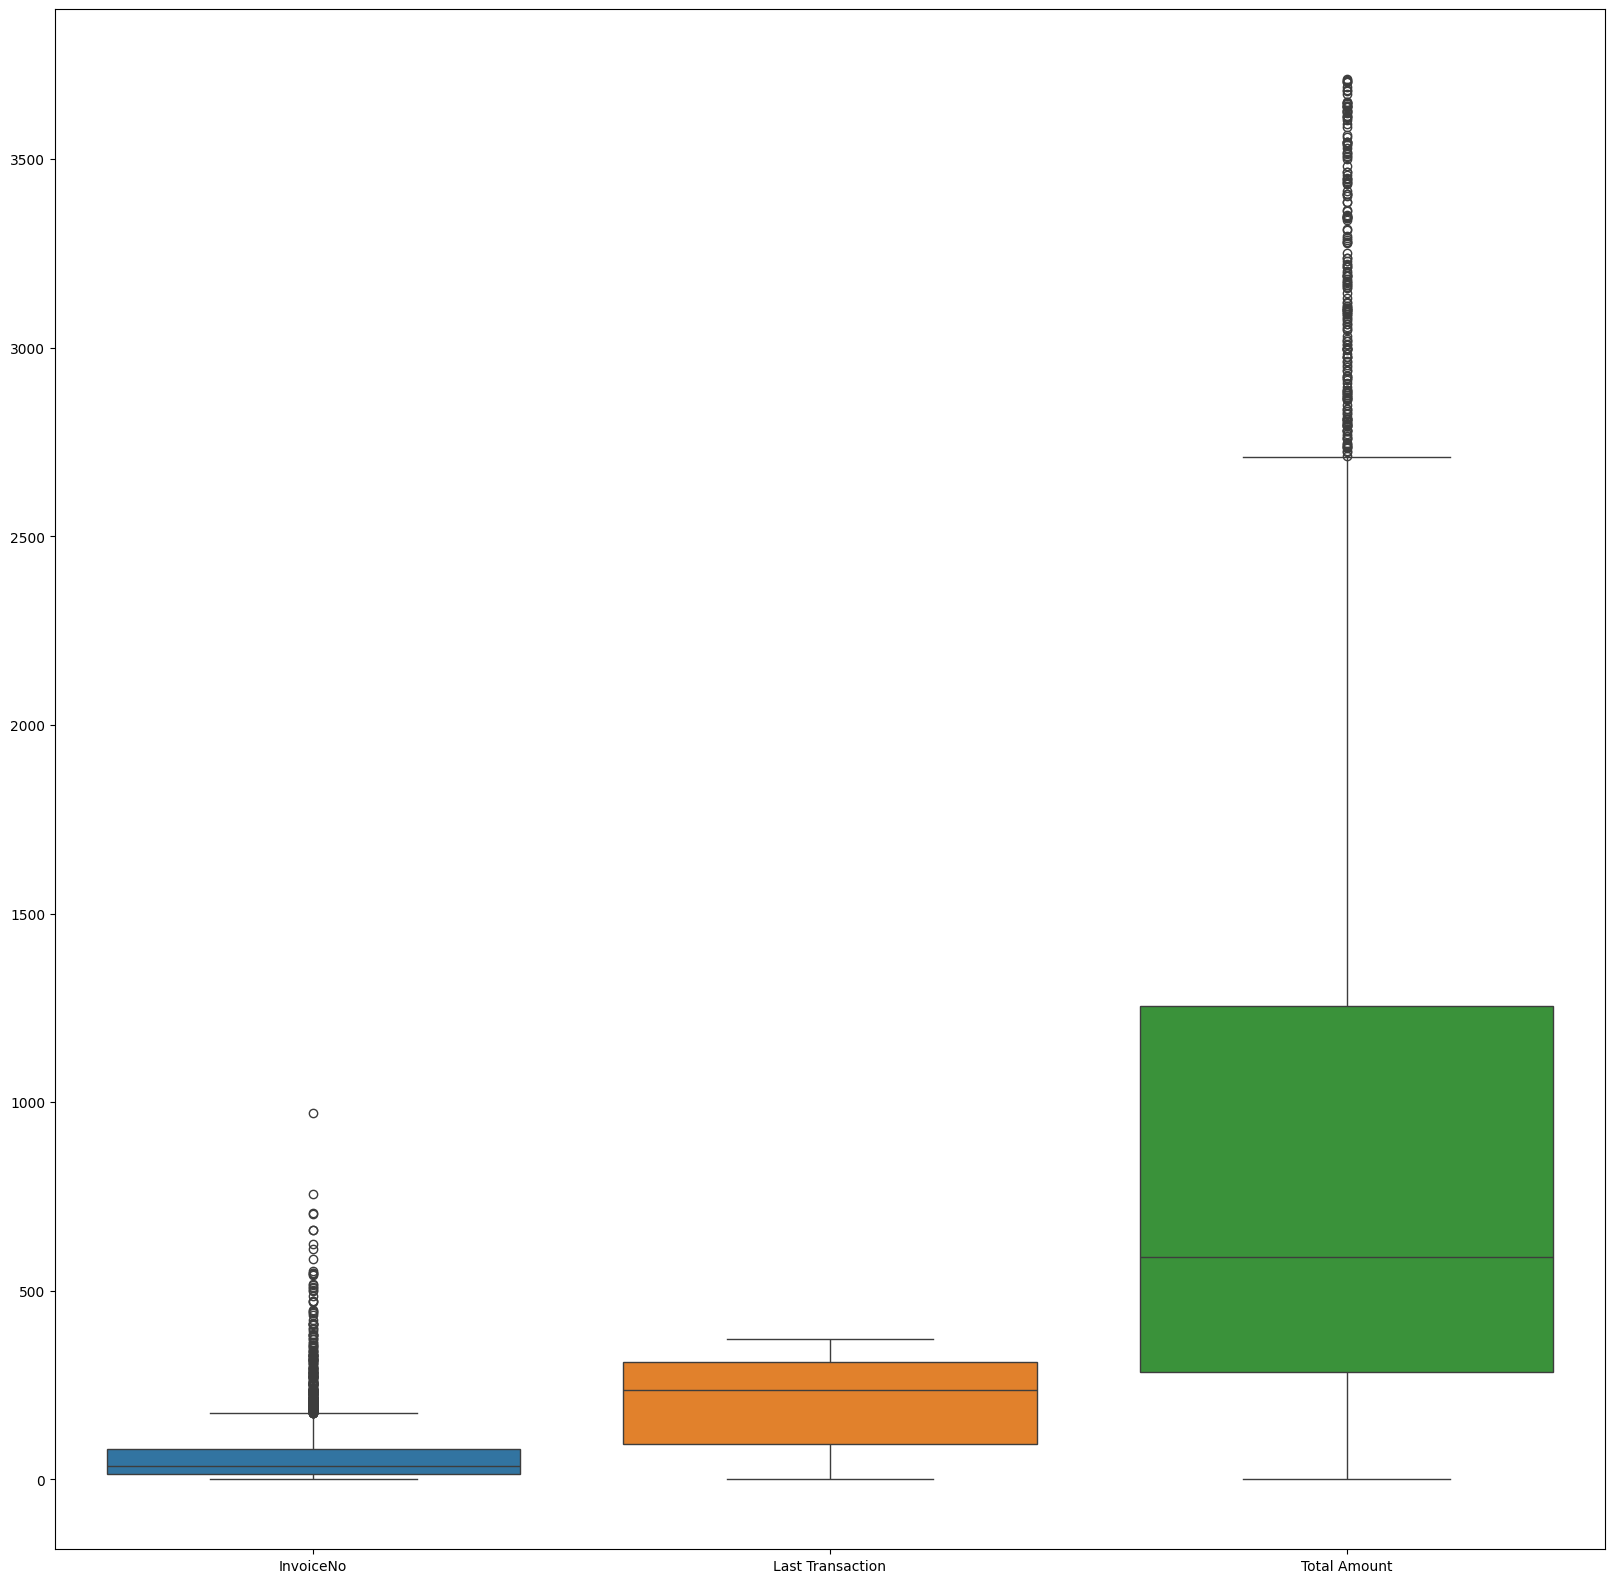

In [130]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df_iqr[['InvoiceNo','Last Transaction','Total Amount']])
plt.show()

In [131]:
new_df_iqr.reset_index(drop=True,inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Total Amount
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


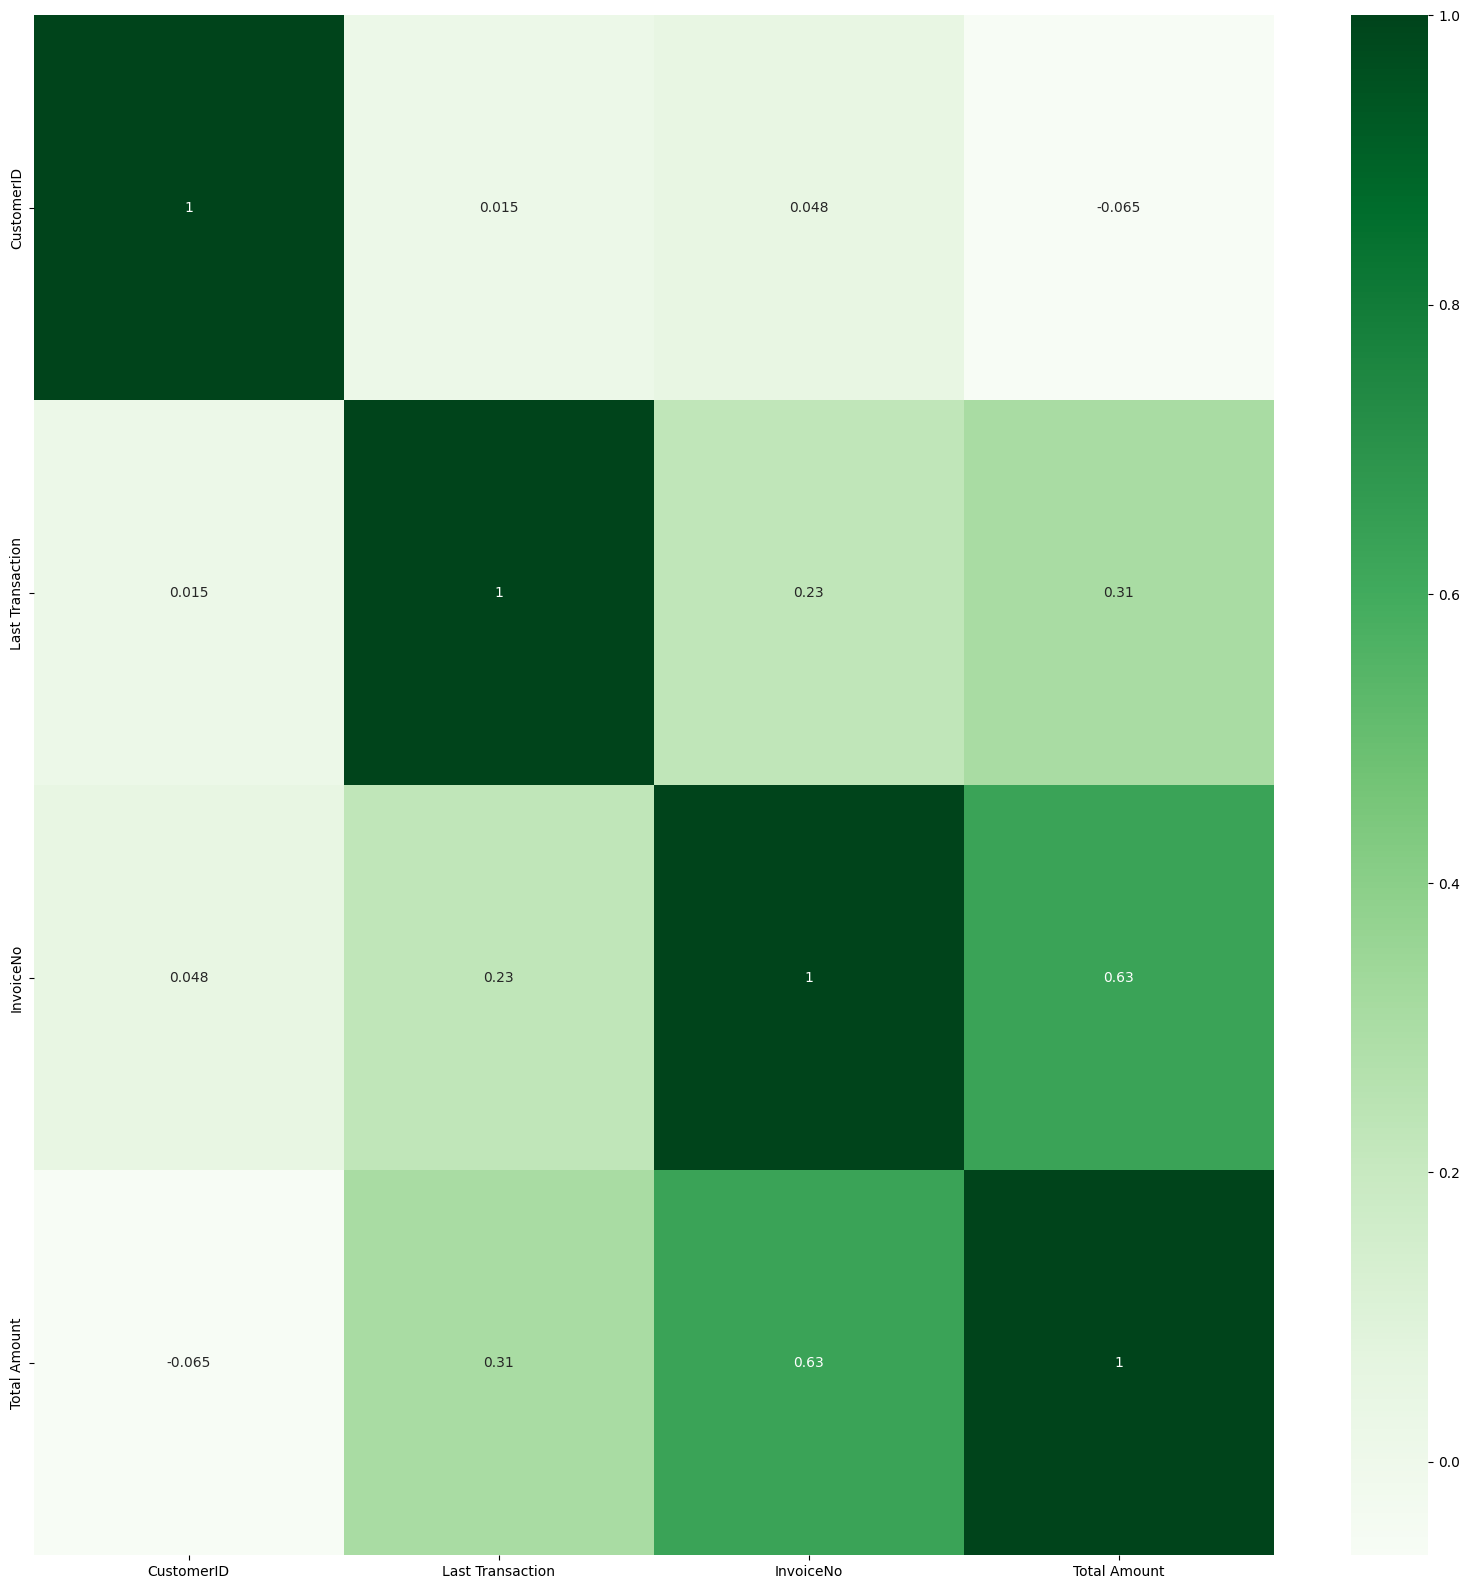

In [133]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_iqr.select_dtypes(include=['number']).corr(), cmap="Greens", annot=True)
plt.show()


In [134]:
from sklearn.preprocessing import MinMaxScaler


In [137]:
new2_df=new_df_iqr[['Last Transaction','InvoiceNo','Total Amount']]
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df,columns=new2_df.columns)
scaled_df['Country']=new_df_iqr['Country']
scaled_df

,Last Transaction,InvoiceNo,Total Amount,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


**K-means clustering - plot the graph using elbow mwthod**

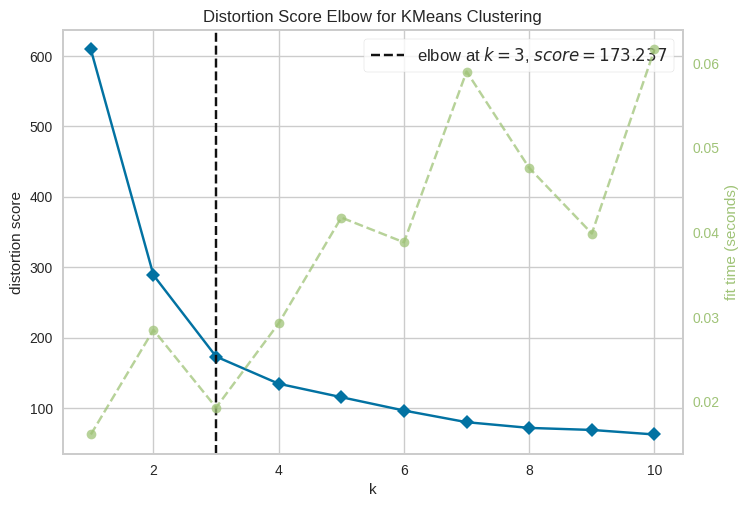

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
df_k=scaled_df.drop('Country',axis=1)
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,11),timingd=False)
visualizer.fit(df_k)
visualizer.show()

In [143]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_k)
df_k['clusters']=y_predicted
df_k

,Last Transaction,InvoiceNo,Total Amount,clusters
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,0
2,0.828418,0.016512,0.090092,1
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,1
...,...,...,...,...
3918,0.742627,0.009288,0.048656,1
3919,0.482574,0.006192,0.021774,0
3920,0.335121,0.011352,0.047969,0
3921,0.900804,0.779154,0.564388,2


In [146]:
km.cluster_centers_


array([[0.22076895, 0.04001774, 0.14851301],
       [0.77665026, 0.04271404, 0.15749496],
       [0.79796367, 0.15825709, 0.63324065]])

In [147]:
#Model evaluation
from sklearn.metrics import silhouette_score
score=silhouette_score(df_k,km.labels_,metric='euclidean')
print(score)

0.7738379838035234
